In [159]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [160]:
# Image directories
# Melakukan ekstraksi data gambar dan definisikan lokasi gambar
train_dir = "images/images/training/"
test_dir = "images/images/test/"

In [161]:
# Fungsi untuk memuat dataset gambar
def load_dataset(img_dir, img_ext = 'jpg'):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('\\')[-1]
        for file in dir.glob('*.' + img_ext):
            img = cv2.imread(file)
            img = standarized_input(img)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [162]:
# Ekstrak data gambar
train_img = load_dataset(train_dir)
test_img = load_dataset(test_dir)

Mendefinisikan fungsi preprocess() untuk menyiapkan data gambar agar dapat digunakan dalam proses klasifikasi, dengan mengubah ukuran gambar agar konsisten dan mengonversi label kategorikal menjadi format numerik yang diperlukan untuk pelatihan model machine learning.

In [163]:
# Fungsi untuk menstandarisasi gambar
def standarized_input(image):
    # mengubah warna gambar ke RGB
    std_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # mengubah ukuran gambar ke 1100x600
    std_img = cv2.resize(std_img, (1100,600))

    return std_img

Fungsi encoding digunakan untuk mengkonversi label kategori menjadi format numerik, yang seringkali diperlukan dalam pemrosesan data untuk machine learning. Dalam konteks pengolahan citra siang dan malam, fungsi ini mempermudah representasi kategori sehingga model machine learning dapat memprosesnya.

In [164]:
# Fungsi untuk melakukan encoding
def label_encoder(label):
    # melakuakan encoding label
    # 0 = night || 1 = day

    num_val = 0

    if(label == 'day'):
        num_val = 1
    
    return num_val

In [165]:
# Fungsi untuk mmengekstrak histogram
def extract_histogram(image):
    # mengambil histogram dari gambar
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # melakukan normalisasi histogram
    hist_norm = cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)

    return hist_norm

Pada saat mengambil histogram dari gambar terdapat 5 parameter, dimana parameter pertama digunakan untuk list gambar, parameter kedua digunakann untuk list dari channel yang akan dihitung, parameter ketiga digunakan untuk mask (di sini None, artinya tidak ada mask yang diterapkan), parameter keempat digunakan untuk ukuran histogram (dalam hal ini 256 bins, satu untuk setiap nilai intensitas dari 0 hingga 255).

In [166]:
# Fungsi untuk mengekstrak fitur
def extract_avg_intensity(img, threshold=40):

    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    hist = extract_histogram(img)

    avg_low_hist = [np.mean(hist[:threshold])]

    avg_high_hist = [np.mean(hist[threshold:])]

    return avg_low_hist, avg_high_hist

Fungsi ini berfungsi untuk membagi histogram gambar menjadi dua bagian berdasarkan nilai ambang batas (threshold), yaitu intensitas rendah dan intensitas tinggi.

Lalu fungsi ini menghitung rata-rata dari kedua bagian tersebut, yang berguna untuk mengetahui distribusi intensitas dalam gambar (misalnya untuk analisis pencahayaan atau kontras dalam gambar).

In [167]:
# Fungsi untuk mengekstrak rata-rata
def extract_avg_color(img):
    avg_color = cv2.mean(img)[:3]
    return avg_color

Fungsi diatas digunakan untuk mendapatkan warna rata-rata dari sebuah gambar. Hasilnya adalah tuple yang berisi nilai rata-rata dari tiap komponen warna biru, hijau, dan merah dalam gambar.

In [168]:
# Melakukan pengelolahan data gambar
if len(train_img) > 0:
    rand_num = np.random.randint(0, len(train_img))
else:
    print("train_img is empty.")


Pada kode program diatas dilakuakn pengecekan sebelum memilih indeks acak dari train_img, program memeriksa apakah train_img berisi elemen. Jika kosong, program mencetak pesan peringatan. Ini adalah contoh penanganan kasus untuk mencegah kesalahan, seperti pemilihan indeks acak dari daftar kosong yang dapat menyebabkan error.

In [169]:
# Proses pemilihan gambar secara acak
rand_num = np.random.randint(0, len(train_img))

Kode program diatas bertujuan untuk memilih indeks acak dari variabel train_img (misalkan daftar atau array gambar latih). Jadi, bilangan acak yang dihasilkan akan mewakili indeks elemen dalam array train_img.

Contohnya, jika train_img memiliki 100 gambar, maka kode ini bisa menghasilkan bilangan acak antara 0 hingga 99, yang bisa digunakan untuk mengakses salah satu gambar secara acak dari array tersebut.

AVERAGE LOW INTENSITY HISTOGRAM:  [21.711864]
AVERAGE HIGH INTENSITY HISTOGRAM:  [61.08889]
AVERAGE COLOR:  (99.01048484848485, 87.10826212121212, 84.15915000000001)


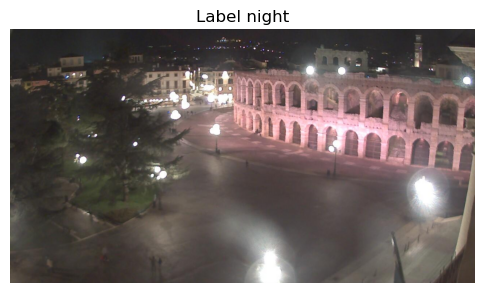

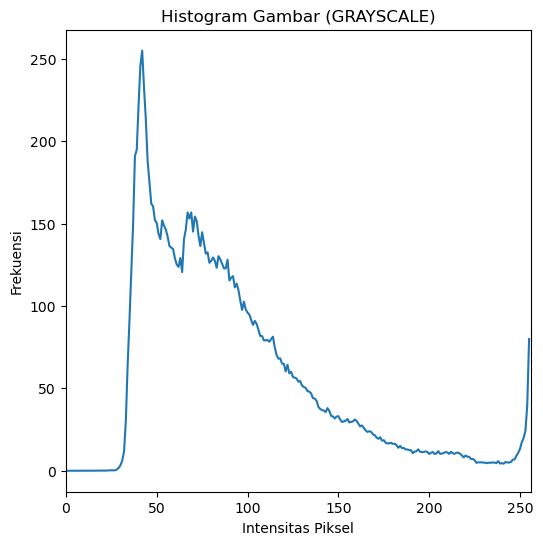

In [170]:
# Proses analisis citra
img = train_img[rand_num]

img_gray = cv2.cvtColor(img[0], cv2.COLOR_RGB2GRAY)
hist = extract_histogram(img_gray)
avg_low_hist, avg_high_hist = extract_avg_intensity(img[0]) # Menghitung rata-rata
avg_color = extract_avg_color(img[0]) # Mendapatkan rata-rata citra berwarna

# Mencetak hasil rata-rata intensitas rendah dan tinggi, serta warna rata-rata dari citra
print("AVERAGE LOW INTENSITY HISTOGRAM: ", avg_low_hist)
print("AVERAGE HIGH INTENSITY HISTOGRAM: ", avg_high_hist)
print("AVERAGE COLOR: ", avg_color)

# Menampilkan gambar citra
plt.figure(figsize=(6, 6)) # Membuat figure
plt.imshow(img[0]) # Menampilkan citra
plt.title("Label " + str(img[1]))
plt.axis('off')
plt.show()

# Menampilkan histogram citra
plt.figure(figsize=(6, 6))
plt.plot(hist) # Menampilkan histogram
plt.title('Histogram Gambar (GRAYSCALE)')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')
plt.xlim([0, 256])

plt.show()

Pada kode program diatas dilakukan beberapa langkah untuk menganalisis citra, diantaranya:
- Mengubah citra RGB ke greyscale untuk menghitung histogram intensitas piksel.
- Menghitung rata-rata intensitas piksel rendah dan tinggi, serta warna rata-rata citra.
- Menampilkan citra asli dan histogram dari citra greyscale.

In [171]:
# Fungsi untuk melakukan preprocessing
def preprocess(img_list):
    # fitur 1
    low_intensity_list = [] # menyimpan nilai rata-rata intensitas rendah

    # fitur 2
    high_intensity_list = [] # menyimpan nilai rata-rata intensitas tinggi

    # fitur 3
    avg_color_list = [] # menyimpan nilai rata-rata komponen warna
    labels = []

    for img in img_list:
        avg_low_hist, avg_high_hist = extract_avg_intensity(img[0])
        avg_color = extract_avg_color(img[0])
        encoded_label = label_encoder(img[1])

        avg_color_list.append(avg_color)
        low_intensity_list.append(avg_low_hist)
        high_intensity_list.append(avg_high_hist)
        labels.append(encoded_label)

    # Stack the data and create a DataFrame
    data = np.column_stack((low_intensity_list, high_intensity_list, avg_color_list, labels))
    
    df = pd.DataFrame(data, columns=['LOW_INTENSITY', 'HIGH_INTENSITY', 'AVG_RED', "AVG_GREEN", 'AVG_BLUE', 'LABEL'])

    return df

Pada kode program diatas dilakukan ekstraksi fitur dari gambar dengan memperoleh intensitas terang atau gelap dari gambar (histogram intensitas), menghitung rata-rata warna dari gambar dan menyimpan label kategori gambar.

In [172]:
# melakukan preprocessing pada data training
train_std_img_list = preprocess(train_img)

train_std_img_list.head()

,LOW_INTENSITY,HIGH_INTENSITY,AVG_RED,AVG_GREEN,AVG_BLUE,LABEL
0,0.776452,27.475464,147.139626,168.653738,170.143197,1.0
1,0.244670,27.164980,150.587386,177.965462,190.923742,1.0
2,61.504883,53.665451,120.815918,116.304661,109.432761,1.0
3,0.044195,34.396664,148.759924,177.651289,198.698012,1.0
4,20.803226,56.263798,94.435568,95.322468,90.043571,1.0


In [173]:
# mengambil data testing
test_img = load_dataset(test_dir)

# melakukan preprocessing pada data testing
test_std_img_list = preprocess(test_img)

test_std_img_list.head()

,LOW_INTENSITY,HIGH_INTENSITY,AVG_RED,AVG_GREEN,AVG_BLUE,LABEL
0,0.792506,35.451134,145.056398,173.794970,193.017133,1.0
1,25.966162,89.521553,143.715144,138.819574,130.403445,1.0
2,0.004970,30.368845,149.358903,177.186733,200.542183,1.0
3,0.684390,26.504154,152.744050,172.727300,185.579526,1.0
4,1.143007,24.815365,151.399774,170.906732,181.013533,1.0


In [174]:
# Implementasi model klasifikasi menggunakan SVM
from sklearn.svm import SVC # Mengimpor SVC dari modul SVM

X_train = train_std_img_list.iloc[:, :-1].values
y_train = train_std_img_list.iloc[:, -1].values
X_test = test_std_img_list.iloc[:, :-1].values
y_test = test_std_img_list.iloc[:, -1].values

model = SVC()
model.fit(X_train, y_train)

SVC()

In [175]:
# Menghitung akurasi
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)

acc_train = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(X_test)

acc_test = accuracy_score(y_test, y_test_pred)

print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.9875
Accuracy on test: 0.93125
